In [3]:
# Useful starting lines
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [4]:
from proj1_helpers import *
from implementations import*

DATA_TRAIN_PATH = '../data/train.csv/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

# Pre-processing


In [9]:
selector = np.all(tX != -999.0, axis=1)
tX_clean = tX[selector]
y_clean = y[selector]

print(tX.shape)
print(tX_clean.shape)
    

(250000, 30)
(68114, 30)


In [32]:
def standardize_NAN(tX):
    tX_nan = tX.copy()
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if (tX_nan[i,j] == -999.0):
                tX_nan[i,j] = np.nan
    return (standardize(tX_nan))

def without_NAN(tX):
    tX_nan = tX.copy()
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if (tX_nan[i,j] == -999.0):
                tX_nan[i,j] = np.nan
    return tX_nan


# Tout les nans (correspondant a des valeurs non connues) sont remplacés par la moyenne de la colonnes
def replace_mean(tX_nan):
    means_cols = np.nanmean(tX_nan,axis=1)
    for row in range(0,tX_nan.shape[0]):
        for col in range(0,tX_nan.shape[1]):
            if np.isnan(tX_nan[row,col]):
                tX_nan[row,col]=means_cols[col]
    return (tX_nan)

tX_ns = without_NAN(tX)
tX_nan, mean_x_nan, std_x_nan = standardize_NAN(tX)
tX_nan = replace_mean(tX_nan)

92.56765498468643


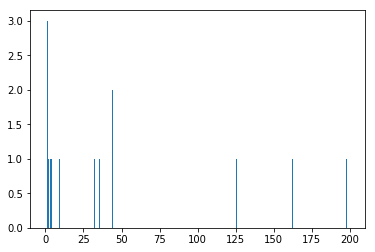

In [34]:
#COL DER_mass_MMC
plt.hist(tX_ns[2], range = (0,200), bins =400)
plt.show()

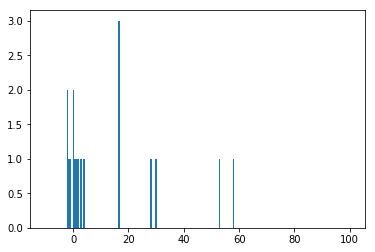

In [36]:
#plt.plot(tX[4])
plt.hist(tX_ns[4], range = (-10,100), bins =200)
plt.show()

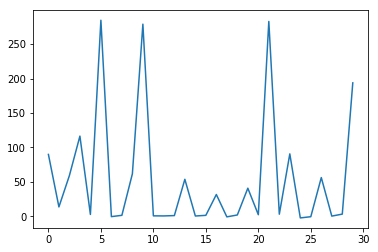

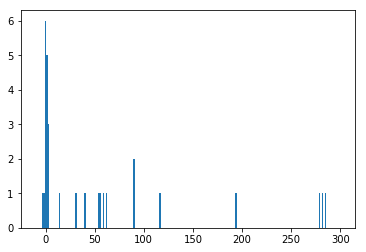

In [40]:
plt.plot(tX[5])
plt.show()
plt.hist(tX[5], range = (-10,300), bins =200)
plt.show()

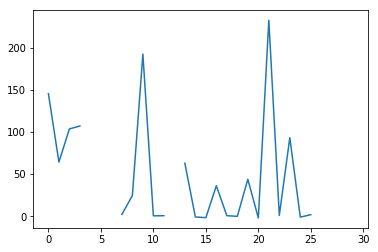

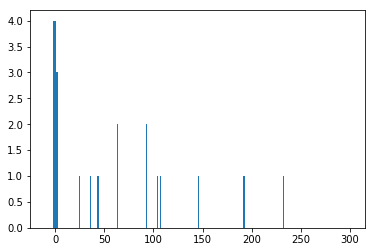

In [60]:
plt.plot(tX_ns[12])
plt.show()
plt.hist(tX_ns[12], range = (-10,300), bins =200)
plt.show()

# 1.Least squares gradient descent

In [10]:
#With tX and y_LS no corrupted
tX_LS, m_X,s = standardize(tX_clean)
tX_LS = tX_LS[0:68110]
y_LS = y_clean[0:68110].copy()

#With nan value replaced
#tX_LS=tX_nan
#y_LS= y

max_iters = 100
gammas = np.logspace(-4,0,20)
K=5

# Initialization
w_initial = np.zeros(tX_LS.shape[1])

list_tX_LS = np.split(tX_LS,K)
list_y_LS = np.split(y_LS,K)

gen_opt_w=[]
gen_mse =[]

#gamma selection
for ind, gamma in enumerate(gammas):
    weights=[]
    mse_errors = []
    #K-fold crossvalidation
    for ind, tX_bloc in enumerate(list_tX_LS):
        tX_test = tX_bloc
        y_test = list_y_LS[ind]
        tX_train= list_tX_LS[:ind] + list_tX_LS[ind+1:]
        tX_train= np.concatenate(tX_train)
        y_train= list_y_LS[:ind] + list_y_LS[ind+1:]
        y_train=np.concatenate(y_train)
        
        mse, opt_w = least_squares_GD(y_train, tX_train, w_initial, max_iters, gamma)
        mse_errors.append(compute_mse(y_test, tX_test,opt_w))
        weights.append(opt_w)
    gen_mse.append(np.mean(mse_errors))
    gen_opt_w.append(np.mean(weights, axis=0))

optimal_gamma_LS_GD = gammas[np.argmin(gen_mse)]
optimal_weights_LS_GD = gen_opt_w[np.argmin(gen_mse)]
print(" gamma={l:.3f},mse={mse:.3f}".format(mse = np.min(gen_mse), l = optimal_gamma_LS_GD))

#Training Accuracy
y_model = predict_labels(optimal_weights_LS_GD, tX_LS)
sum_ = 0
for i,v in enumerate(y_model):
    if(v == y_LS[i]):
        sum_ = sum_+1
print(sum_/len(y_model))

#With tX_CLEAN : accuracy = 0.6823, mse= 0.825, gamma = 0.0055
#With tX_NAN : accuracy= 0.705, mse= 0.737, gamma = 0.089


134.10663740969926
 gamma=0.055,mse=0.825
0.6822786668624284


# Least square SDG

We can alter the gamma and the batch size

In [ ]:


#With tX and y_LS no corrupted
tX_LS, m_X,s = standardize(tX_clean)
tX_LS = tX_LS[0:68110]
y_LS = y_clean[0:68110].copy()

#With nan value replaced
#tX_LS=tX_nan
#y_LS= y

max_iters = 50
max_batch_size = 32
gammas = np.logspace(-4,0,20)
batch_sizes = np.power(np.arrange(1,4),2)

# Initialization
w_initial = np.zeros(tX_LS.shape[1])
list_tX_LS = np.split(tX_LS,K)
list_y_LS = np.split(y_LS,K)


result_mse =[]
result_opt_w=[]
result_gamma=[]
for ind_batch,batch_size in enumerate(batch_sizes):  
    result_mse_gamma = []
    result_opt_w_gamma = []
    for ind_gamma,gamma in enumerate(gammas):
        mse_errors=[]
        weights=[]
        #K-fold crossvalidation
        for ind, tX_bloc in enumerate(list_tX_LS):
            tX_test = tX_bloc
            y_test = list_y_LS[ind]
            tX_train= list_tX_LS[:ind] + list_tX_LS[ind+1:]
            tX_train= np.concatenate(tX_train)
            y_train= list_y_LS[:ind] + list_y_LS[ind+1:]
            y_train=np.concatenate(y_train)
        
            sgd_mse, opt_w = least_squares_SGD(y_train, tX_train, w_initial, batch_size, max_iters, gamma)
            mse_errors.append(compute_mse(y_test, tX_test,opt_w))
            weights.append(opt_w)
    
        result_mse_gamma.append(np.mean(mse_errors))
        result_opt_w_gamma.append(np.mean(weights,axis=0))
    result_mse.append(np.min(result_mse_gamma))
    result_gamma.append(np.argmin(result_mse_gamma))
    result_opt_w.append(result_opt_w_gamma[np.argmin(result_mse_gamma)])

print(np.min(result_mse))
print(result_gamma[np.argmin(result_mse)])
print(np.argmin(result_mse))
print(" gamma={l:.3f}, batch={b:.0f}, mse={mse:.3f}".format(mse = np.min(result_mse), l =result_gamma[np.argmin(result_mse)], b=np.argmin(result_mse)))

optimal_weights_LS_SGD = result_opt_w[np.argmin(result_mse)]
print(optimal_weights_LS_SGD)

#Training Accuracy
y_model = predict_labels(optimal_weights_LS_SGD, tX_LS)
sum_ = 0
for i,v in enumerate(y_model):
    if(v == y_LS[i]):
        sum_ = sum_+1
print(sum_/len(y_model))

#With tX_CLEAN : accuracy = , mse= , gamma = , batch=
#With tX_NAN : accuracy= , mse= , gamma = ,batch=



## Generate predictions and save ouput in csv format for submission:

In [7]:
DATA_TEST_PATH = '../data/test.csv/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [8]:
OUTPUT_PATH = './leastSquareGD' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(optimal_weights_LS_GD, tX_test)
print(y_pred.shape)
print(tX_test.shape[0])
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

(568238,)
568238
